In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import cv2
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

dataset: https://www.kaggle.com/datasets/jayaprakashpondy/food-101-dataset

In [2]:
train_dir= 'C:/Users/SanthoshkumarSambamo/Downloads/food_101/food-101-torch/train'  # change the path 
test_dir= 'C:/Users/SanthoshkumarSambamo/Downloads/food_101/food-101-torch/test' 

In [3]:
batch_size = 25
epochs = 5
img_height = 128
img_width = 128

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 20200 images belonging to 101 classes.


In [6]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 16846 images belonging to 101 classes.


In [7]:
import warnings
 

import os
import glob
import matplotlib.pyplot as plt

# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [8]:
from tensorflow.keras.applications.mobilenet import MobileNet


In [9]:
 base_model = MobileNet(weights = 'imagenet', include_top=False, input_shape=(128, 128, 3))


In [10]:
base_model.trainable = False

In [11]:
base_model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 8, 8, 512)        2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 8, 8, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 8, 8, 512)        4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 8, 8, 512)        2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 8, 8, 512)         0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 8, 8, 512)         262144    
                                                                 
 conv_pw_9

In [12]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D


In [13]:
xception_net = tf.keras.models.Sequential()

xception_net.add(base_model)
xception_net.add(GlobalAveragePooling2D())
xception_net.add(Dense(101, activation = 'softmax'))
xception_net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 101)               103525    
                                                                 
Total params: 3,332,389
Trainable params: 103,525
Non-trainable params: 3,228,864
_________________________________________________________________


In [14]:
xception_net.compile(optimizer= 'adam' , loss= 'categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = xception_net.fit(train_data_gen, epochs=20,
validation_data= val_data_gen,)

Epoch 1/20
808/808 [==============================] - 357s 439ms/step - loss: 2.9839 - accuracy: 0.3106 - val_loss: 1.7934 - val_accuracy: 0.5443
Epoch 2/20
808/808 [==============================] - 320s 396ms/step - loss: 1.8821 - accuracy: 0.5222 - val_loss: 1.3790 - val_accuracy: 0.6494
Epoch 3/20
808/808 [==============================] - 322s 398ms/step - loss: 1.5114 - accuracy: 0.6095 - val_loss: 1.1220 - val_accuracy: 0.7127
Epoch 4/20
808/808 [==============================] - 322s 399ms/step - loss: 1.2680 - accuracy: 0.6688 - val_loss: 0.9298 - val_accuracy: 0.7664
Epoch 5/20
808/808 [==============================] - 331s 409ms/step - loss: 1.0807 - accuracy: 0.7158 - val_loss: 0.7902 - val_accuracy: 0.8046
Epoch 6/20
808/808 [==============================] - 322s 398ms/step - loss: 0.9309 - accuracy: 0.7564 - val_loss: 0.7128 - val_accuracy: 0.8237
Epoch 7/20
808/808 [==============================] - 358s 443ms/step - loss: 0.8175 - accuracy: 0.7892 - val_loss: 0.5991 -

In [16]:
xception_net.save('food.h5')

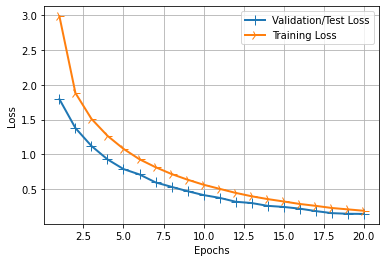

In [17]:


history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

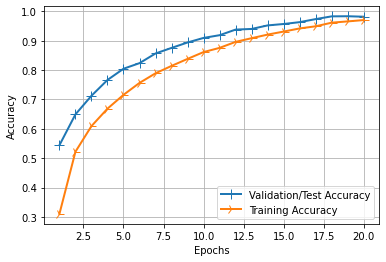

In [18]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()